In [15]:
from pymongo import MongoClient 
import pandas as pd

# data ID
folder_name = 'oxts_09'

# open connection
connection = MongoClient()
 
# get db
db = connection.study

# get DB data from mongoDB to dataframe
query = {'file_id':folder_name}
df_data = pd.DataFrame.from_records(db.ML201809.find(query))

# delete DB id 
del df_data['_id']

print df_data


            af        al         alt        au        ax        ay        az  \
0     0.052324 -0.297096  114.471153  9.746157 -0.032663  0.260820  9.747496   
1     0.047379 -0.275508  114.471367  9.764645 -0.038159  0.288237  9.764432   
2     0.019957 -0.234036  114.470764  9.721545 -0.065690  0.332061  9.718452   
3     0.060052 -0.232976  114.470299  9.789666 -0.026316  0.342642  9.786544   
4     0.100468 -0.222049  114.470482  9.809209  0.013796  0.360321  9.805528   
5     0.094630 -0.250141  114.469849  9.716796  0.008337  0.332058  9.714818   
6     0.073802 -0.237844  114.469330  9.665533 -0.012279  0.346749  9.662481   
7     0.058388 -0.220567  114.469879  9.632561 -0.027672  0.367502  9.628119   
8     0.044605 -0.191384  114.469093  9.558940 -0.041131  0.397411  9.552426   
9     0.027357 -0.168694  114.468491  9.564397 -0.058542  0.425850  9.556022   
10   -0.009472 -0.141744  114.468903  9.617294 -0.095900  0.461392  9.606494   
11   -0.014878 -0.092402  114.468018  9.

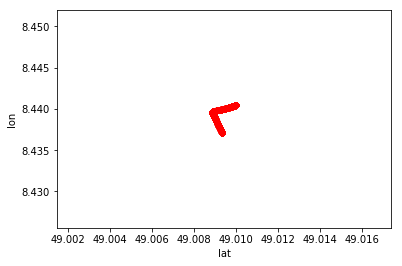

In [13]:
import matplotlib.pyplot as plt

# a scatter plot comparing num_children and num_pets
df_data.plot(kind='scatter',x='lat',y='lon',color='red')

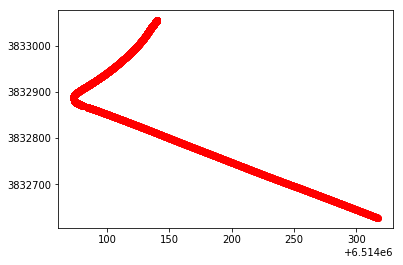

In [16]:
import matplotlib.pyplot as plt
import pyproj

wgs84=pyproj.Proj("+init=EPSG:4326") # LatLon with WGS84 datum used by GPS units and Google Earth
rgf93=pyproj.Proj("+init=EPSG:2154")
xx, yy = pyproj.transform(wgs84, rgf93, df_data['lat'].tolist(), df_data['lon'].tolist())

plt.scatter(xx,yy,color='red')